# House Price Prediction

- Introduction

#### Surpise Housing, an US company Planned to enter in the australian market. By analysing the sales data in austrilan market, the company wanted to purchase at a lower price and flip it at a higher price. 

- understand the pricing dynamics of a new market by analysing the depandency of the house prices on the independent variables to generate a robust model to predict the price of the house.This model will then be used by the management to accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis,skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
path = r"train.csv"
df = pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape

(1460, 81)

In [5]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

- NAN values are present in the dataset

In [6]:
missing_val = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = True)
missing_val.tail(15)

BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtExposure     2.602740
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

- missing values are present
- drop the columns with 50% of missing values

In [7]:
df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [8]:
df.describe() #numerical columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())    # Can see presence of outlier
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

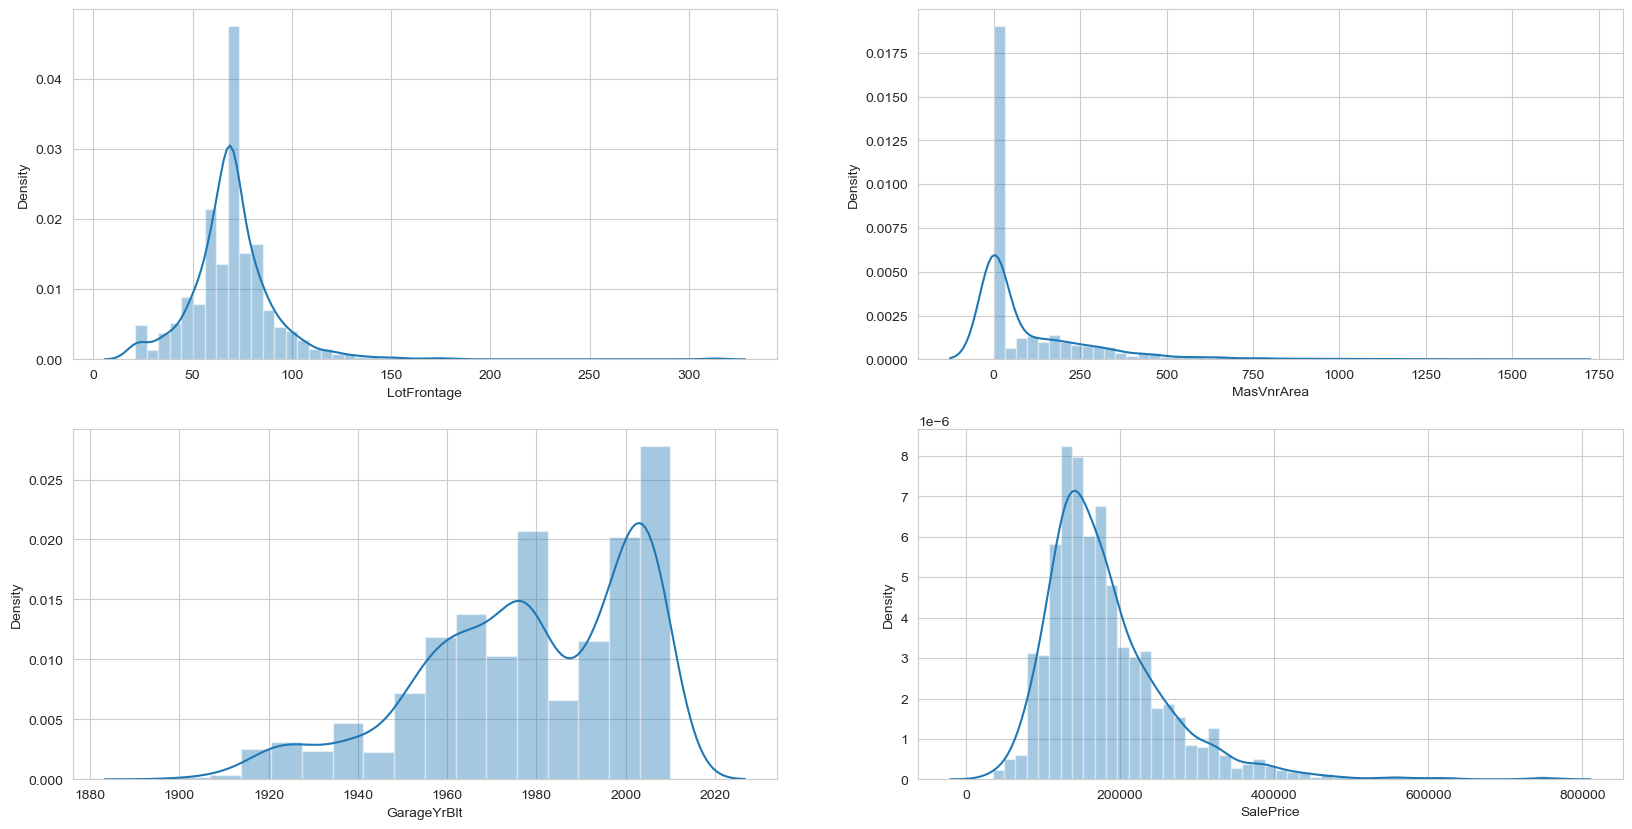

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.distplot(df['LotFrontage'])
plt.subplot(2,2,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(2,2,3)
sns.distplot(df['GarageYrBlt'])
plt.subplot(2,2,4)
sns.distplot(df['SalePrice'])

- skewness is present in the dependent variable, this should be traeated by transforming the data to normal distribution

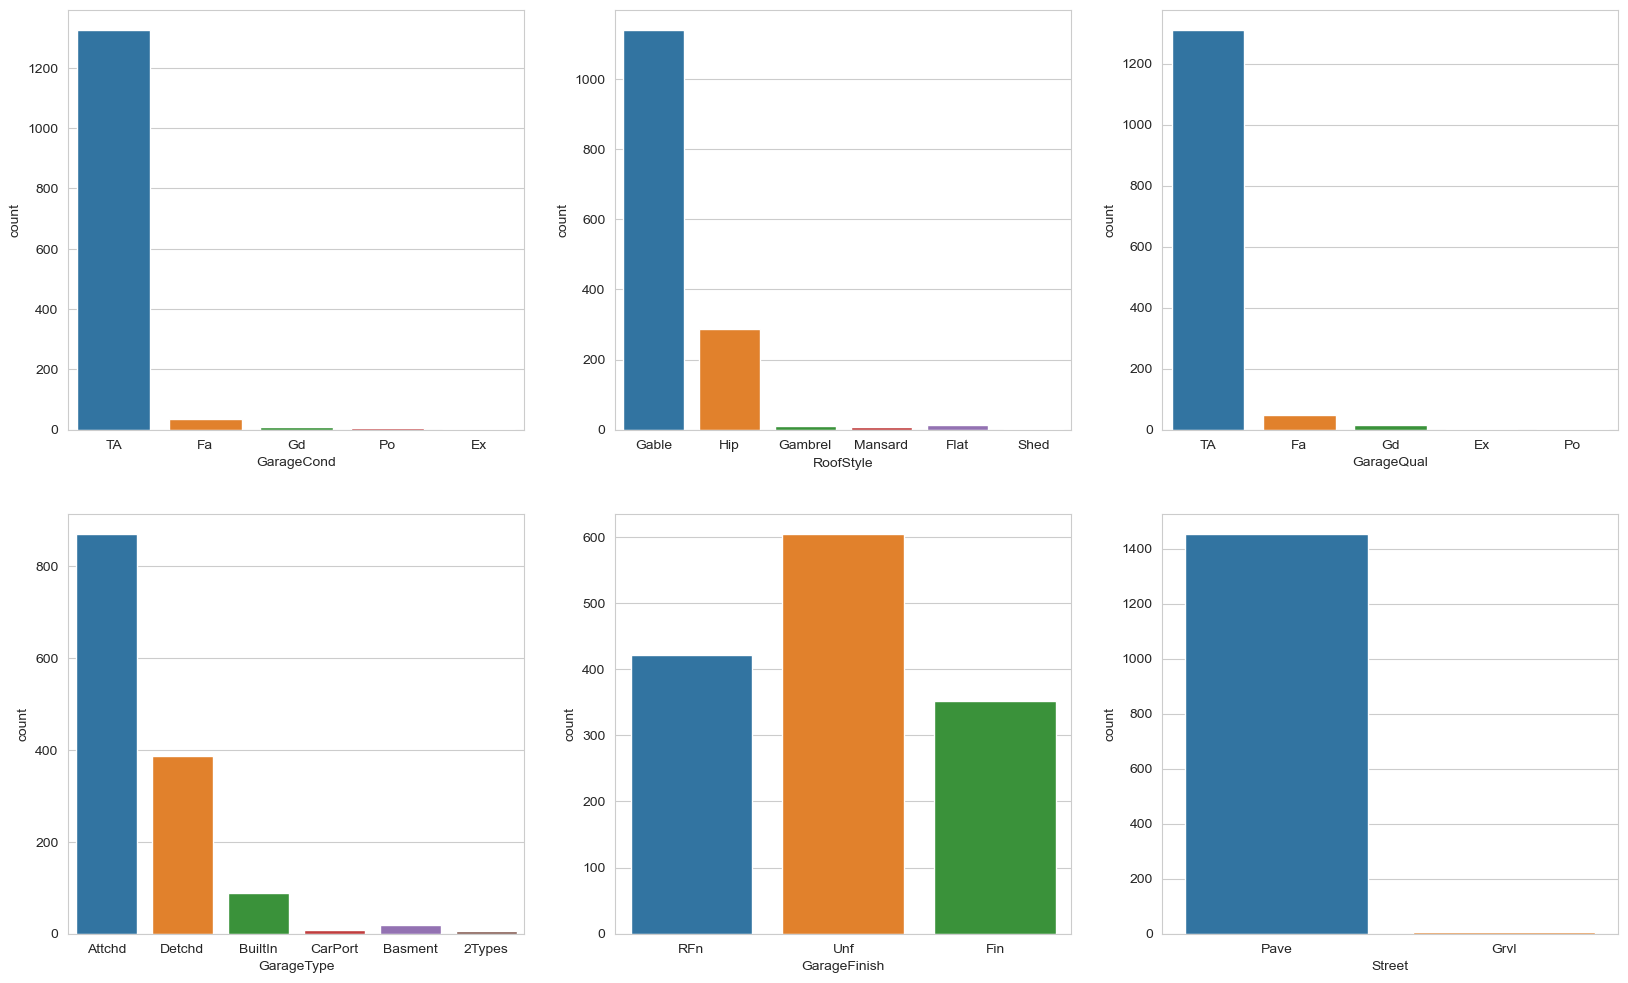

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'Street', data = df)
plt.show()


- Garagecond and Garage qual are highly skewed

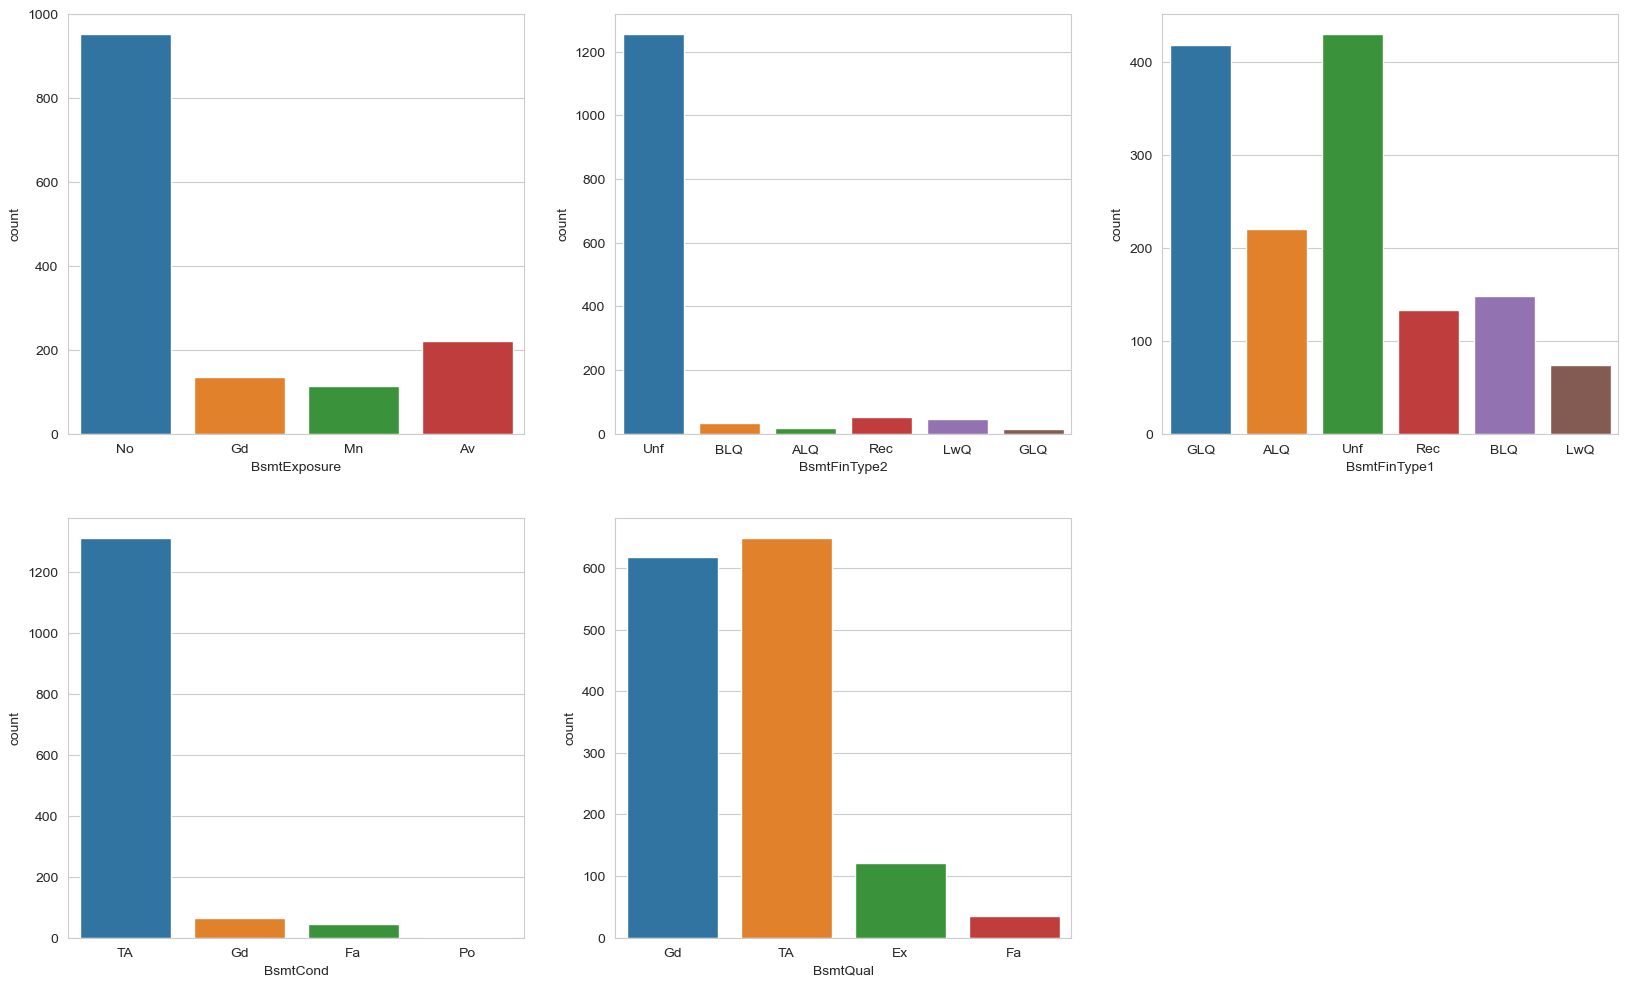

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = df)

plt.show()

In [13]:
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')  
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')

In [14]:
#changing num to categorical so as to form these as dummy variables 
df['MSSubClass']=df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual']=df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
df['OverallCond']=df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [15]:
missing_val = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = True)
missing_val.tail(15)

BsmtFinSF1      0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
BsmtQual        0.0
Foundation      0.0
ExterCond       0.0
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
YearRemodAdd    0.0
SalePrice       0.0
dtype: float64

- performing log transformation

In [16]:
df['SalePrice']=np.log(df.SalePrice)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

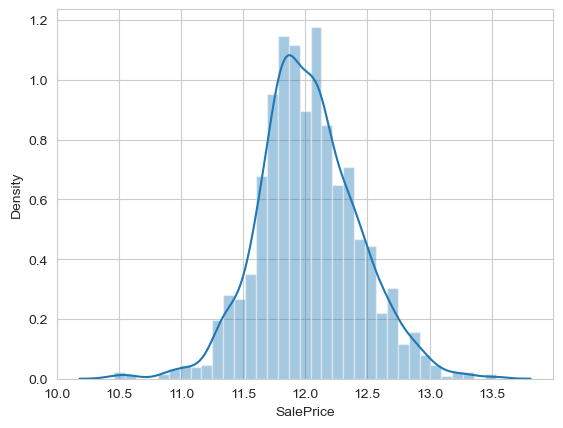

In [17]:
sns.distplot(df['SalePrice'])

- analysis of effect of independent variables on dependent variable "saleprice"

In [18]:
Cat = df.select_dtypes(include=['object'])

In [19]:
df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [20]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [21]:
df.drop(['Functional'],axis=1,inplace=True) #dropping the skewd counts

In [22]:
df.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

In [23]:
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')



<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

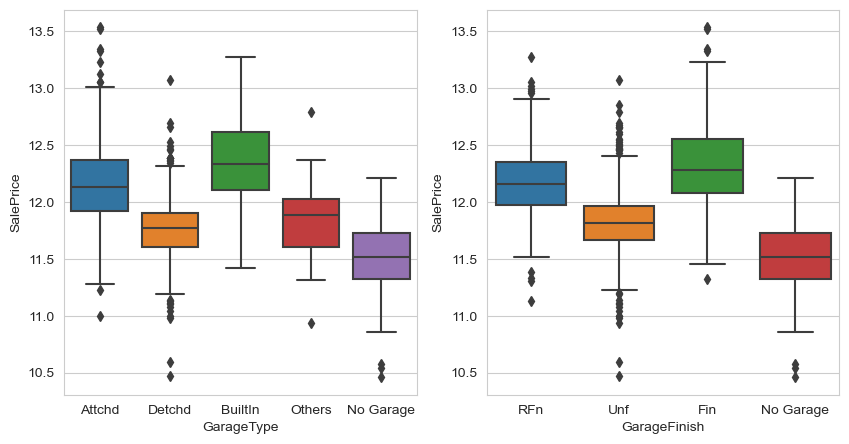

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data =df)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [25]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [26]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [27]:
df['CentralAir'].value_counts()# Drop  highly skewed column 

Y    1365
N      95
Name: CentralAir, dtype: int64

In [28]:

df['Heating'].value_counts()# Drop  highly skewed column

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [29]:
df['ExterCond'].value_counts()# Drop  highly skewed column 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [30]:
df['Foundation'] = df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

df.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [31]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [32]:
df.drop(['RoofMatl'],axis=1,inplace=True)

In [33]:
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

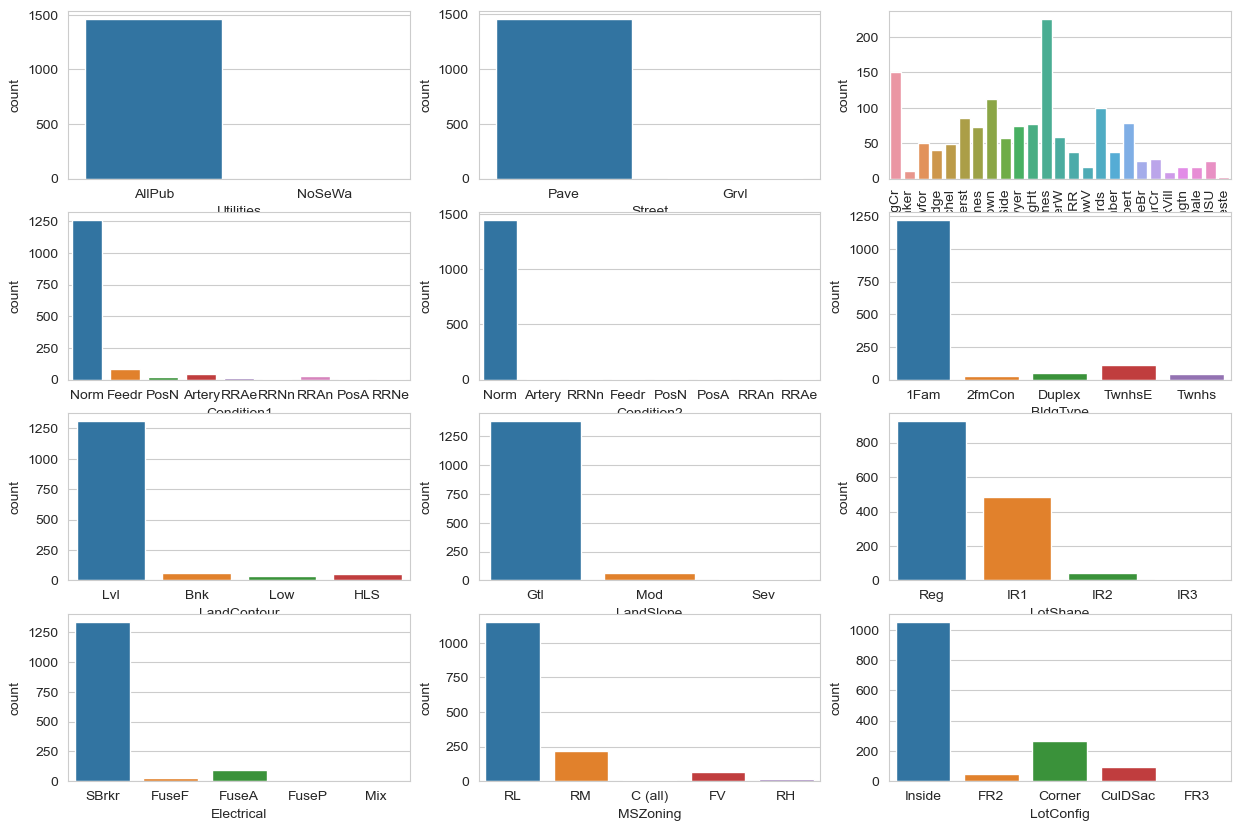

In [34]:
plt.figure(figsize=(15, 10))
plt.subplot(4,3,1)
sns.countplot(x = 'Utilities',  data = df)
plt.subplot(4,3,2)
sns.countplot(x = 'Street', data = df)
plt.subplot(4,3,3)
sns.countplot(x = 'Neighborhood', data = df)
plt.xticks(rotation=90)
plt.subplot(4,3,4)
sns.countplot(x = 'Condition1', data = df)
plt.subplot(4,3,5)
sns.countplot(x = 'Condition2',  data = df)
plt.subplot(4,3,6)
sns.countplot(x = 'BldgType', data = df)
plt.subplot(4,3,7)
sns.countplot(x = 'LandContour',  data = df)
plt.subplot(4,3,8)
sns.countplot(x = 'LandSlope', data = df)
plt.subplot(4,3,9)
sns.countplot(x = 'LotShape', data = df)
plt.subplot(4,3,10)
sns.countplot(x = 'Electrical', data = df)
plt.subplot(4,3,11)
sns.countplot(x = 'MSZoning',  data = df)
plt.subplot(4,3,12)
sns.countplot(x = 'LotConfig', data = df)
plt.show()

In [35]:
df.drop(['Utilities','Street','Condition1','Condition2','LandSlope','LandContour','Electrical'],axis=1,inplace=True)

In [36]:
df['MSZoning'] = df['MSZoning'].replace(['RH','C (all)'],'Others')

In [37]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [38]:
df['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [39]:
df['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [40]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [41]:
df.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

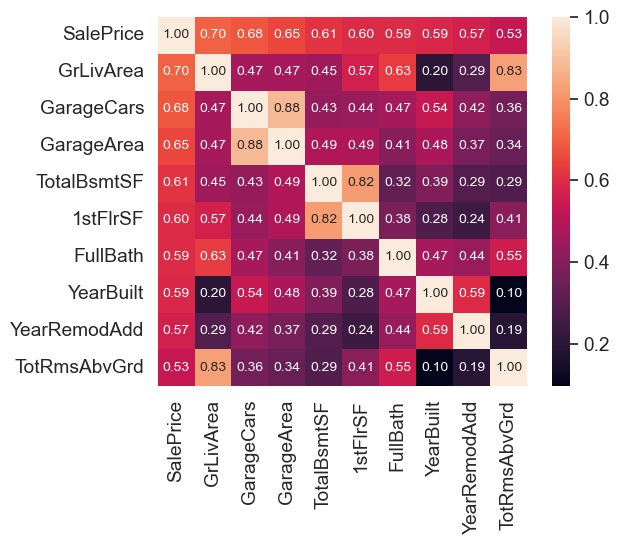

In [43]:
#saleprice correlation matrix
corrmat = df.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index #  k = 10  number of variables for heatmap
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
df['YearSinceRemodel'] = 2010 - ((df['YearRemodAdd'] - df['YearBuilt']) + df['YearBuilt']) #feature engineering

In [45]:
Cat1 = df.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables

In [46]:
Num = df.select_dtypes(include=['int64','float64']) #all numerical variables


In [47]:
Cat1.columns,Num.columns

(Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
        'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
        'GarageType', 'GarageFinish', 'SaleCondition'],
       dtype='object'),
 Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'YearSinceRemodel'],
       dtype='object'))

In [48]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [49]:
df = pd.concat([df, Cat1], axis=1) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,0,0,1,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,...,0,0,0,0,0,1,0,1,0,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,0,0,1,0,1,0,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,...,0,1,0,0,0,0,1,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-STORY 1946 & NEWER,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,Above Average,...,0,0,0,0,0,1,0,1,0,0
1456,1-STORY 1946 & NEWER ALL STYLES,RL,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,Above Average,...,0,0,0,0,0,0,1,1,0,0
1457,2-STORY 1945 & OLDER,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,Good,...,0,0,0,0,0,1,0,1,0,0
1458,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,Average,...,0,0,0,0,0,0,1,1,0,0


In [50]:
df.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','OverallCond','MSSubClass','OverallQual','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [51]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [52]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=101)

In [54]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

In [55]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
175,0.648547,0.199495,-0.572764,0.067013,-0.300509,0.364076,0.329059,2.643014,-0.790791,-0.116032,...,0,0,0,0,0,0,1,1,0,0
776,0.741299,0.062280,0.754495,-0.970092,-0.300509,2.339310,1.307036,1.197028,-0.790791,-0.116032,...,0,0,0,0,0,1,0,0,0,1
840,-0.047091,0.154570,-0.572764,-0.661457,-0.300509,-0.110980,-0.929019,-0.940056,0.747596,-0.116032,...,0,1,0,0,0,0,1,1,0,0
1162,1.807944,-0.180507,-0.572764,0.101053,-0.300509,-0.370101,-0.402051,-0.716778,-0.790791,-0.116032,...,0,0,0,0,0,0,0,1,0,0
1200,0.045661,-0.119078,-0.572764,-1.015479,-0.300509,0.680023,-0.473263,-0.796520,-0.790791,-0.116032,...,0,0,0,0,0,0,1,0,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=101)

## Ridge

In [57]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007157,0.005034,0.002423,0.000472,0.00004,{'alpha': 4e-05},0.892471,0.908326,0.835849,0.908527,...,0.883981,0.027091,6,0.927026,0.924795,0.941789,0.923612,0.932033,0.929851,0.006629
1,0.004041,0.000013,0.002215,0.000416,0.0001,{'alpha': 0.0001},0.892472,0.908328,0.835850,0.908531,...,0.883983,0.027092,5,0.927026,0.924795,0.941789,0.923612,0.932033,0.929851,0.006629
2,0.004548,0.000443,0.002014,0.000027,0.001,{'alpha': 0.001},0.892483,0.908358,0.835864,0.908596,...,0.884008,0.027104,4,0.927026,0.924795,0.941789,0.923612,0.932033,0.929851,0.006629
3,0.004025,0.000018,0.001812,0.000407,0.01,{'alpha': 0.01},0.892594,0.908646,0.836008,0.909205,...,0.884252,0.027218,3,0.927026,0.924794,0.941788,0.923609,0.932032,0.929850,0.006630
4,0.004630,0.000494,0.002023,0.000647,0.1,{'alpha': 0.1},0.893534,0.910630,0.837124,0.913120,...,0.885968,0.027926,2,0.926997,0.924749,0.941750,0.923506,0.932007,0.929802,0.006643


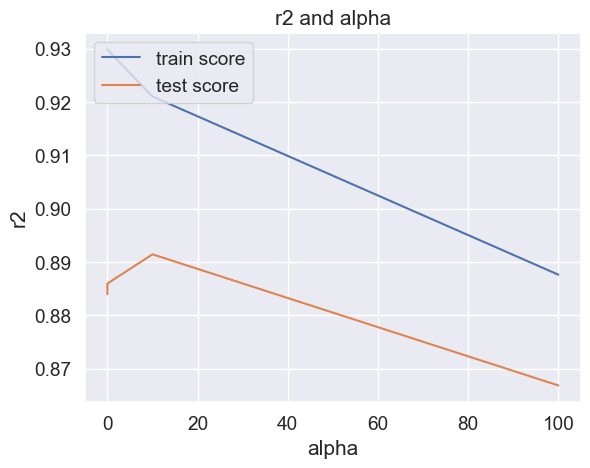

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.49583342e-04,  1.23899933e-06,  5.50127617e-05,  6.08965445e-05,
        3.37473671e-05,  1.96238040e-05,  1.14267716e-04,  4.95449889e-05,
        8.74386968e-05, -3.32339647e-05,  1.03749719e-04,  1.44376759e-02,
       -3.11824367e-03,  3.61448393e-02,  3.09482712e-02,  1.98359882e-03,
       -5.68502525e-02,  7.33836908e-03,  3.12235090e-02,  2.87307341e-02,
        9.87279480e-05,  1.14920158e-04,  1.30648498e-04,  3.33461174e-05,
        1.10263907e-04,  2.13872297e-04,  2.20701308e-04, -4.81582471e-06,
        5.52735177e-04, -1.17560336e-03, -1.15794960e-02, -7.65029836e-02,
        2.87545056e-02,  1.12849902e-03,  9.72484682e-03, -1.13758069e-02,
       -4.64475242e-03,  4.05342902e-02,  2.91012045e-02, -4.29253571e-02,
        1.50758238e-02,  2.38495455e-03, -2.06337597e-03,  1.77382233e-02,
       -3.44385229e-02, -1.10076845e-02, -5.09078760e-02,  1.55931968e-02,
        4.98772465e-03,  1.81502667e-03,  3.92488588e-02, -2.12994957e-02,
       -1.12621436e-02, -

In [61]:
ridge.score(X_train,y_train)

0.9194886339387098

In [62]:
ridge.score(X_test,y_test)

0.7709347541449936

In [63]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.462),
 ('LotFrontage', -0.121),
 ('LotArea', -0.118),
 ('MasVnrArea', -0.08),
 ('BsmtFinSF1', -0.079),
 ('BsmtFinSF2', -0.077),
 ('BsmtUnfSF', -0.072),
 ('TotalBsmtSF', -0.064),
 ('1stFlrSF', -0.062),
 ('2ndFlrSF', -0.06),
 ('LowQualFinSF', -0.06),
 ('GrLivArea', -0.057),
 ('BsmtFullBath', -0.055),
 ('BsmtHalfBath', -0.055),
 ('FullBath', -0.054),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.051),
 ('TotRmsAbvGrd', -0.047),
 ('Fireplaces', -0.044),
 ('GarageCars', -0.044),
 ('GarageArea', -0.044),
 ('WoodDeckSF', -0.043),
 ('OpenPorchSF', -0.039),
 ('EnclosedPorch', -0.036),
 ('3SsnPorch', -0.036),
 ('ScreenPorch', -0.034),
 ('PoolArea', -0.034),
 ('MiscVal', -0.033),
 ('MoSold', -0.031),
 ('YearSinceRemodel', -0.03),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.03),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.028),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.027),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

## Lasso

In [64]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021707,0.002689,0.002536,0.000475,0.00006,{'alpha': 6e-05},0.895602,0.912720,0.838942,0.918865,...,0.888755,0.028749,1,0.926520,0.924279,0.941157,0.922630,0.931489,0.929215,0.006675
1,0.010380,0.000597,0.002807,0.000403,0.0006,{'alpha': 0.0006},0.896824,0.910951,0.827661,0.920441,...,0.887829,0.032619,2,0.916041,0.914800,0.930805,0.912402,0.921795,0.919169,0.006587
2,0.009046,0.000683,0.002456,0.000507,0.0008,{'alpha': 0.0008},0.895072,0.909188,0.823634,0.917928,...,0.885411,0.033316,3,0.912170,0.911324,0.927316,0.908845,0.917992,0.915529,0.006613
3,0.009466,0.000794,0.002825,0.000391,0.001,{'alpha': 0.001},0.891267,0.906873,0.819924,0.915281,...,0.882389,0.033694,4,0.908495,0.907678,0.923695,0.904979,0.914236,0.911817,0.006661
4,0.007955,0.000202,0.002431,0.000496,0.002,{'alpha': 0.002},0.882169,0.893778,0.802967,0.900701,...,0.869658,0.035073,5,0.893596,0.890399,0.907493,0.886908,0.897403,0.895160,0.007076


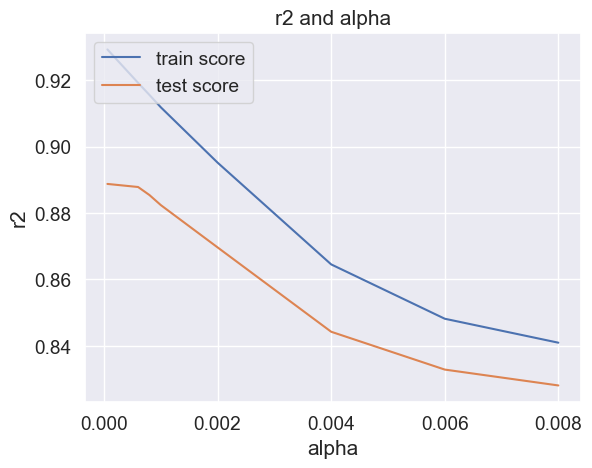

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#lasso.coef_

Lasso(alpha=0.001)

In [68]:
lasso.score(X_train,y_train)

0.908693536231739

In [69]:
lasso.score(X_test,y_test)

0.7446758296370197

In [70]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.35),
 ('LotFrontage', -0.138),
 ('LotArea', -0.132),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.077),
 ('BsmtFinSF2', -0.067),
 ('BsmtUnfSF', -0.06),
 ('TotalBsmtSF', -0.058),
 ('1stFlrSF', -0.053),
 ('2ndFlrSF', -0.052),
 ('LowQualFinSF', -0.051),
 ('GrLivArea', -0.04),
 ('BsmtFullBath', -0.035),
 ('BsmtHalfBath', -0.033),
 ('FullBath', -0.033),
 ('HalfBath', -0.029),
 ('BedroomAbvGr', -0.028),
 ('KitchenAbvGr', -0.026),
 ('TotRmsAbvGrd', -0.023),
 ('Fireplaces', -0.02),
 ('GarageCars', -0.019),
 ('GarageArea', -0.018),
 ('WoodDeckSF', -0.013),
 ('OpenPorchSF', -0.012),
 ('EnclosedPorch', -0.012),
 ('3SsnPorch', -0.011),
 ('ScreenPorch', -0.01),
 ('PoolArea', -0.01),
 ('MiscVal', -0.009),
 ('MoSold', -0.007),
 ('YearSinceRemodel', -0.006),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.006),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.004),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.003),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.

- Conclusion :
   - we got a decent score for both Ridge and Lasso regression.
        - Ridge : Train :91.94 Test :77.09
        - Lasso : Train :90.86 Test :74.46
   - Top 5 most significant variables in Ridge are:
        - ('SaleCondition_Partial', 0.13)
        - ('SaleCondition_Others', 0.083),
        - ('SaleCondition_Normal', 0.083),
        - ('GarageFinish_Unf', 0.081),
        - ('GarageFinish_RFn', 0.079),

    -Top 5 most significant variables in Lasso are:
        -('SaleCondition_Partial', 0.168)
        -('SaleCondition_Others', 0.089)
        -('SaleCondition_Normal', 0.085)
        -('GarageFinish_Unf', 0.085)
       - ('GarageFinish_RFn', 0.064)
   - These Varaiables are directly proportional to each other.
   - Optimal Value of lamda for ridge : 10
   - Optimal Value of lamda for Lasso : 0.001
    -Because of Feature selection as well we can choose Lasso regression in this case.